In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df.shape

(50000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [6]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

#### replace missing values of avg_rating_of_driver and avg_rating_by_driver with their mean since we are dealing with averages initially

In [7]:
df.fillna(df.mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


#### Replace missing categorical values in phone with 'unknown'

In [8]:
df.phone.fillna("unknown", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [9]:
#converting  signup_date and last_trip_date to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [10]:
df['last_trip_date'].describe()

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [11]:
df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


## EDA 

<AxesSubplot:>

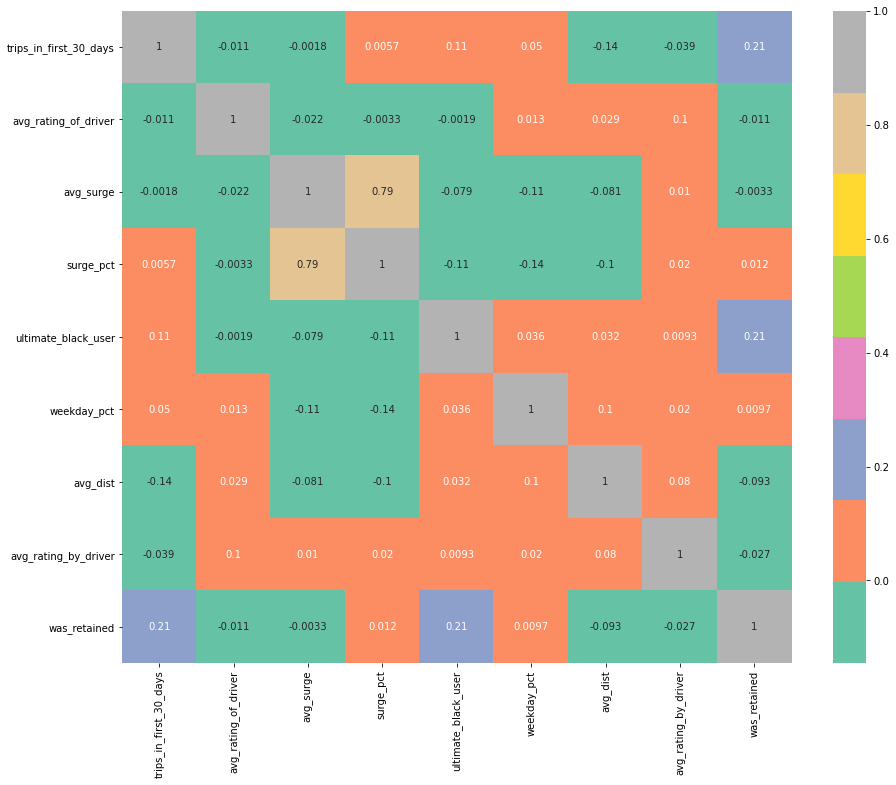

In [12]:
plt.figure(figsize=(15, 12))
cm = df.corr()
sns.heatmap(cm, annot=True, cmap='Set2')

In [13]:
cm['was_retained'].sort_values(ascending=False)

was_retained              1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.010829
avg_rating_by_driver     -0.026748
avg_dist                 -0.092780
Name: was_retained, dtype: float64

<AxesSubplot:xlabel='was_retained', ylabel='trips_in_first_30_days'>

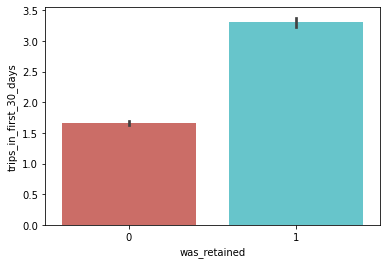

In [14]:
sns.barplot(x='was_retained', y='trips_in_first_30_days', data=df, palette = 'hls')

<AxesSubplot:xlabel='was_retained', ylabel='ultimate_black_user'>

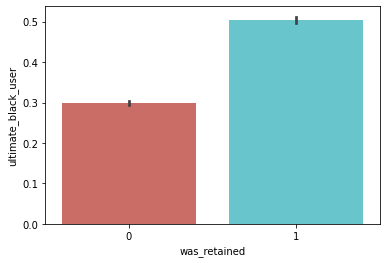

In [15]:
sns.barplot(x='was_retained', y='ultimate_black_user', data=df, palette = 'hls')

#### Dropping since they are not needed

In [16]:
df = df.drop(['signup_date', 'last_trip_date'], axis=1)
model_df = pd.get_dummies(df, columns=['city', 'phone'])
model_df=model_df.astype(float)
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  float64
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   ultimate_black_user     50000 non-null  float64
 5   weekday_pct             50000 non-null  float64
 6   avg_dist                50000 non-null  float64
 7   avg_rating_by_driver    50000 non-null  float64
 8   was_retained            50000 non-null  float64
 9   city_Astapor            50000 non-null  float64
 10  city_King's Landing     50000 non-null  float64
 11  city_Winterfell         50000 non-null  float64
 12  phone_Android           50000 non-null  float64
 13  phone_iPhone            50000 non-null  float64
 14  phone_unknown           50000 non-null

## Modeling

In [17]:
X = model_df.drop(['was_retained'], axis=1)
Y = model_df['was_retained']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=6)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv_dt = RandomizedSearchCV(dt, {'max_depth':np.arange(1,7)}, cv=5)
cv_dt.fit(X_train, y_train)

y_pred_dt = cv_dt.predict(X_test)

print('roc_auc_score:', roc_auc_score(y_test, y_pred_dt))    
print(classification_report(y_test, y_pred_dt))

C:\Users\marka\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


roc_auc_score: 0.7450761965374354
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      9377
         1.0       0.70      0.65      0.68      5623

    accuracy                           0.77     15000
   macro avg       0.75      0.75      0.75     15000
weighted avg       0.77      0.77      0.77     15000



In [21]:
rf = RandomForestClassifier()
rf_para={'n_estimators':np.arange(5,100), 'max_depth':np.arange(1,15)}

cv_rf = RandomizedSearchCV(rf, rf_para, cv=5)

cv_rf.fit(X_train, y_train)

y_pred_rf = cv_rf.predict(X_test)

print('roc_auc_score:', roc_auc_score(y_test, y_pred_rf))    
print(classification_report(y_test, y_pred_rf))

roc_auc_score: 0.7548289561882024
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.84      9377
         1.0       0.75      0.64      0.69      5623

    accuracy                           0.78     15000
   macro avg       0.78      0.75      0.76     15000
weighted avg       0.78      0.78      0.78     15000



In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv_knn = RandomizedSearchCV(knn, {'n_neighbors': np.arange(1,15)}, cv=5)
cv_knn.fit(X_train, y_train)

y_pred_knn = cv_knn.predict(X_test)

print('roc_auc_score:', roc_auc_score(y_test, y_pred_knn))    
print(classification_report(y_test, y_pred_knn))

roc_auc_score: 0.7411435432988239
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      9377
         1.0       0.71      0.64      0.67      5623

    accuracy                           0.77     15000
   macro avg       0.75      0.74      0.75     15000
weighted avg       0.76      0.77      0.76     15000



#### We go with Random forest for feature importance because it had the best AUC score. 


In [23]:
feature_importance = pd.DataFrame({'importance': cv_rf.best_estimator_.feature_importances_}, index=X_train.columns)
feature_importance.sort_values('importance', ascending=False)

,importance
avg_rating_by_driver,0.194117
surge_pct,0.159866
city_King's Landing,0.123300
avg_surge,0.097790
weekday_pct,0.091029
phone_Android,0.067564
ultimate_black_user,0.067000
trips_in_first_30_days,0.054862
city_Astapor,0.038351
phone_iPhone,0.037215


'Avg_rating_by_driver', 'surge_pct', 'avg_dist', and 'weekday_pct'are the four strongest features that predict whether customers are going to be retained. With this said, it would benefit them the most to promote positive driver interactions with the rider.